# Ensemble Learning Workbook

In [1]:
%pylab inline
import numpy as np
import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


In [2]:
""" Import digits dataset. """
# http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
def convert_features_used_to_image_locations(features_used, clf):
    features_used_as_image = np.zeros(64)
    for f in features_used:
        features_used_as_image[f] += 1
    features_used_as_image = features_used_as_image.reshape((8,8))
    locations_of_decision_points = np.argwhere(features_used_as_image > 0)
    return [features_used_as_image, locations_of_decision_points]


In [4]:
def plot_decision_points_on_image(ax, features_used_as_image, locations_of_decision_points):
    [ax.plot(x,y,'r*', ms=15*features_used_as_image[x,y]) for [x,y] in locations_of_decision_points]

# Random Forests

Generally speaking, a random forest is an ensmble learner where the weak learners are decision trees.

Original paper on decision trees:  [Ho, 1995](http://ieeexplore.ieee.org/xpl/login.jsp?arnumber=598994) ([pdf](ftp://cm.bell-labs.com/who/tkh/papers/odt.pdf))

Python's scikit-learn includes most of what we discussed pre-made in its [ensemble](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) library.

Classes to run [Boosting (via AdaBoost)](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) and [Bagging](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) on arbitrary classifiers are given.
However, we will be focusing particularly on a few of the random forest functions given in that sklearn library.


### Bagging

In [5]:
""" Random forests made of bagged decision trees. """
# http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=2, n_jobs=-1)
clf = clf.fit(digits.data, digits.target)
score = clf.score(digits.data, digits.target)

In [11]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor??

In [9]:
""" Pull out decision boundaries from all contained trees. """
features_used_as_image = np.zeros((8,8))
locations_of_decision_points = []

for est in clf.estimators_:  #for each weak learner
    features_used_in_this_tree = [f for f in est.tree_.feature if f != -2]
    [features_used_as_image_in_this_tree, locations_of_decision_points_in_this_tree] = \
        convert_features_used_to_image_locations(features_used_in_this_tree, est)
    features_used_as_image += features_used_as_image_in_this_tree
    locations_of_decision_points += list(locations_of_decision_points_in_this_tree)

locations_of_decision_points = list(set([tuple(c) for c in locations_of_decision_points]))
print(locations_of_decision_points)

[(1, 2), (3, 2), (6, 6), (5, 6), (4, 2), (4, 4), (1, 5), (2, 4), (0, 5), (3, 4), (5, 3), (2, 2), (3, 6), (7, 5), (2, 3), (2, 5), (4, 1), (0, 2), (4, 3), (3, 5)]


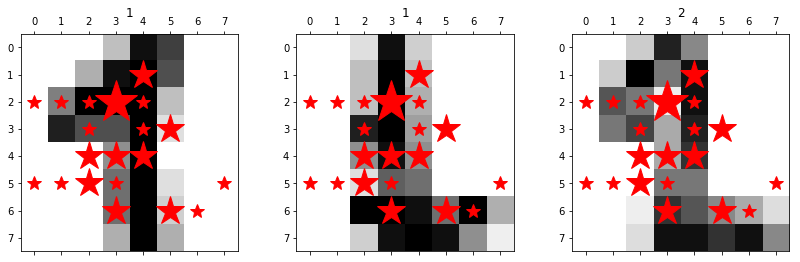

In [10]:
""" Plot 3 random digits, with decision boundaries labeled using ensemble learner. """

N = len(digits.data)
samples_to_show = np.random.randint(0,N,3)
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
f.set_figwidth(14)
ax1.set_title(digits.target[samples_to_show[0]])
ax1.matshow(digits.images[samples_to_show[0]], cmap=cm.gray_r)
plot_decision_points_on_image(ax1, features_used_as_image, locations_of_decision_points)

ax2.set_title(digits.target[samples_to_show[1]])
ax2.matshow(digits.images[samples_to_show[1]], cmap=cm.gray_r)
plot_decision_points_on_image(ax2, features_used_as_image, locations_of_decision_points)

ax3.set_title(digits.target[samples_to_show[2]])
ax3.matshow(digits.images[samples_to_show[2]], cmap=cm.gray_r)
plot_decision_points_on_image(ax3, features_used_as_image, locations_of_decision_points)

### Boosting

1 0.409571508069
2 0.554257095159
3 0.662771285476
4 0.794657762938
5 0.827490261547
6 0.864774624374
7 0.877017250974
8 0.903171953255
9 0.918196994992
10 0.937673900946
11 0.942682248191
12 0.954368391764
13 0.9632721202
14 0.968836950473
15 0.973288814691
16 0.962159154146
17 0.950473010573
18 0.942682248191
19 0.920422927101
20 0.890929326656
21 0.818030050083
22 0.837506956038
23 0.824707846411
24 0.813578185865


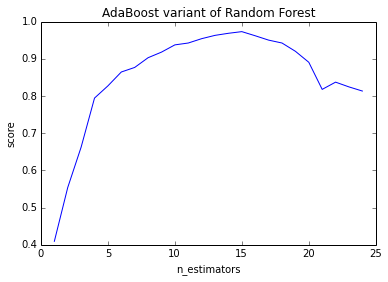

In [17]:
""" Boosing """
# http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
from sklearn.ensemble import GradientBoostingClassifier

scores = []
list_of_n_estimators = range(1,25)
for n in list_of_n_estimators: # for n_estimators in [1:15]
    temp_scores = []
    for i in range(5):  # repeat this 5 times
        clf = GradientBoostingClassifier(n_estimators=n, learning_rate=0.9,
            max_depth=2, random_state=0, max_features=3).fit(digits.data, digits.target)
        score = clf.score(digits.data, digits.target)
        temp_scores.append(score)
    avg_score = float(sum(temp_scores))/len(temp_scores)
    scores.append(avg_score)
    print n, avg_score
    

plot(list_of_n_estimators, scores)
xlabel("n_estimators")
ylabel("score")
title("AdaBoost variant of Random Forest")

# Regarding learning rate:  http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting-shrinkage


In [21]:
from time import time
from sklearn.ensemble import GradientBoostingClassifier

scores = []
times = []
list_of_n_estimators = range(1,25)
for n in list_of_n_estimators: # for n_estimators in [1:15]
    temp_scores = []
    t0 = time()
    for i in range(5):  # repeat this 5 times

        clf = GradientBoostingClassifier(n_estimators=n, learning_rate=0.9,
            max_depth=2, random_state=0, max_features=3).fit(digits.data, digits.target)
        score = clf.score(digits.data, digits.target)
        temp_scores.append(score)
    t1 = time()
    avg_score = float(sum(temp_scores))/len(temp_scores)
    avg_time = float((t1 - t0)/ 5.)
    times.append(avg_time)
    scores.append(avg_score)
    print(n, avg_score, avg_time)
    


1 0.4056761268781302 0.01919898986816406
2 0.45742904841402343 0.03217182159423828
3 0.5386755703951029 0.04406394958496094
4 0.6427378964941569 0.05298290252685547
5 0.7134112409571508 0.06542501449584961
6 0.7746243739565943 0.07475090026855469
7 0.7902058987200891 0.08730559349060059
8 0.8208124652198109 0.10254735946655273
9 0.832498608792432 0.10825881958007813
10 0.8430717863105175 0.11908922195434571
11 0.852531997774068 0.1350992202758789
12 0.845854201446856 0.143867826461792
13 0.8530884808013356 0.15973501205444335
14 0.862548692264886 0.17767877578735353
15 0.8280467445742905 0.18084959983825682
16 0.7835281023928771 0.19721198081970215
17 0.7200890372843628 0.21379461288452148
18 0.6983861992209237 0.2127202033996582
19 0.6800222593210907 0.21847057342529297
20 0.5937673900946021 0.22938799858093262
21 0.10461880912632164 0.23992114067077636
22 0.021146355036171398 0.27018027305603026
23 0.021146355036171398 0.2781005859375
24 0.021146355036171398 0.2915992259979248


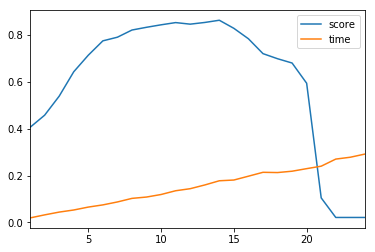

In [22]:
import pandas as pd
pd.DataFrame(list(zip(scores, times)), index=list_of_n_estimators, columns='score time'.split()).plot()
# plot(list_of_n_estimators, scores)
# xlabel("n_estimators")
# ylabel("score")
# title("AdaBoost variant of Random Forest")

# Regarding learning rate:  http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting-shrinkage


sklearn on selecting the number of boosting iterations using [out-of-bag estimates](# regarding selection of number of iterations: 
http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_oob.html#example-ensemble-plot-gradient-boosting-oob-py)

In [18]:
# Challenge: Add the time it takes to train and test a learner to the previous "n_estimators vs score" graph
# Play with the 'max features' in a similar way.  (i.e., look for a good value for it)
# What are the parameters of the best GradientBoostingClassifier you can make? 
#   (and did you split your data into train and test sets?)

In [19]:
# Graph the effect the number of estimators has on performance where n_estimators is in [1,50]

In [20]:
# Explore the relation between n_estimators and learning_rate

In [21]:
# Pick a good set of paramters (n_estimators, learning_rate, max_depth)

## Other Variants and Final Challenges:

In [22]:
# As in Ho 1995, add processed features and re-train a learner of your choice.

In [23]:
# Train/test split.  (careful so all classes are represented in both data sets)

In [24]:
""" Very random trees.  (even the decisions are random)"""
# http://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees
# Get ExtraTreesClassifier working on digits dataset.  Pick some good parameters

' Very random trees.  (even the decisions are random)'

In [25]:
# Compare performance of ExtraTreesClassifier to RandomForestClassifier

In [27]:
""" Play with AdaBoost or Bagging objects directly """
# if you aren't already, switch over to using the AdaBoost or Bagging Classifiers given in sklearn.ensemble to create a forest.
# Then use this framework to drop in a different classifier as a weak learner and compare your new predictor to your old random forest

' Play with AdaBoost or Bagging objects directly '

## Other Datasets:
* "the" MNIST [handwritten digits dataset](http://yann.lecun.com/exdb/mnist/)
* [Housing Prices](http://www.cs.toronto.edu/~delve/data/census-house/desc.html)